In [3]:
using Plots
using JSON

In [4]:
data = []
open("output.json") do f
    global data = JSON.parse(f)
end
;

In [5]:
function aggregate(data, keep_keys)
    agg = Dict()
    for data_ptr in data
        keys_ = tuple((data_ptr[keep_key] for keep_key in keep_keys)...)
        percent_err = abs(data_ptr["sim_time"] - data_ptr["analytic_time"]) / data_ptr["sim_time"] * 100
        if haskey(agg, keys_)
            agg[keys_] += [percent_err, 1]
        else
            agg[keys_] = [percent_err, 1]
        end
    end
    keys_ = []
    vals_ = []
    for key in keys(agg)
        push!(keys_, key)
        push!(vals_, agg[key][1]/ agg[key][2])
    end
    h_keys = [[key[i] for key in keys_] for i in 1:length(keep_keys)]
    return h_keys..., vals_
end

aggregate (generic function with 1 method)

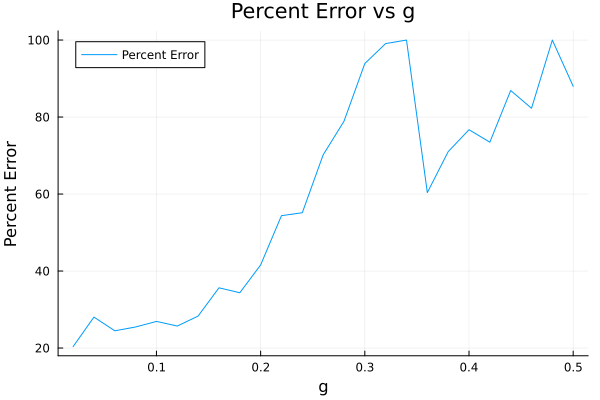

In [6]:
gs, percent_errs = aggregate(data, ["g"])
percent_errs = clamp.(percent_errs, 0, 100)
perm = sortperm(gs)
gs = gs[perm]
percent_errs = percent_errs[perm]
plot(gs, percent_errs, label="Percent Error", xlabel="g", ylabel="Percent Error", title="Percent Error vs g")

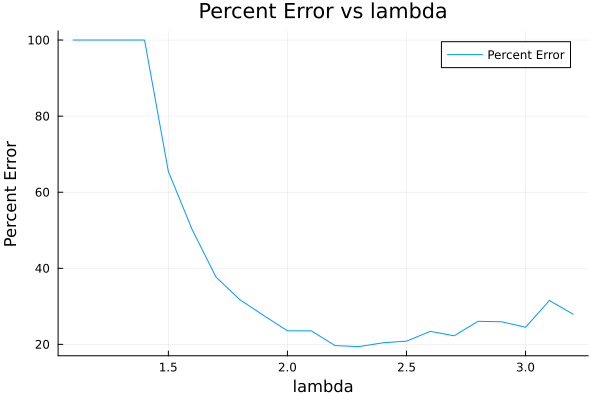

In [9]:
lambdas, percent_errs = aggregate(data, ["lambda"])
percent_errs = clamp.(percent_errs, 0, 100)
perm = sortperm(lambdas)
lambdas = lambdas[perm]
percent_errs = percent_errs[perm]
plot(lambdas, percent_errs, label="Percent Error", xlabel="lambda", ylabel="Percent Error", title="Percent Error vs lambda")

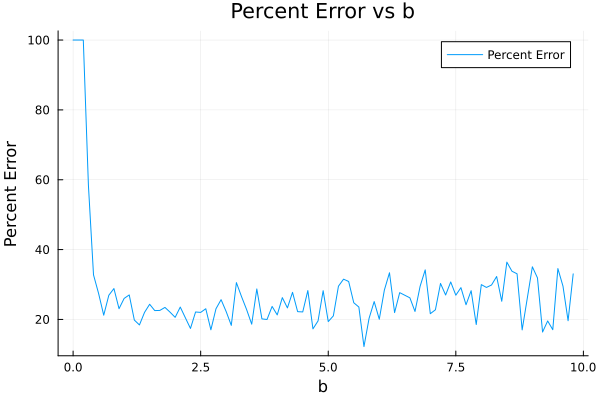

In [8]:
bs, percent_errs = aggregate(data, ["b"])
percent_errs = clamp.(percent_errs, 0, 100)
perms = sortperm(bs)
bs = bs[perms]
percent_errs = percent_errs[perms]
plot(bs, percent_errs, label="Percent Error", xlabel="b", ylabel="Percent Error", title="Percent Error vs b")

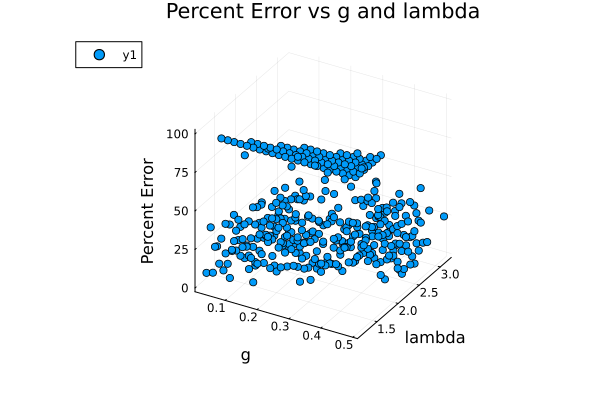

In [24]:
gs, lambdas, percent_errs = aggregate(data, ["g", "lambda"])
percent_errs = clamp.(percent_errs, 0, 100)
scatter(gs, lambdas, percent_errs, xlabel="g", ylabel="lambda", zlabel="Percent Error", title="Percent Error vs g and lambda")